### Packages:

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

# Instructions: 

1. Create a `data` folder in your local project repository.  
2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

2.	Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.  
 - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.
3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

# Questions: 

## Q4

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


## Answer:

In [2]:
#Reading file
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

#Top 5 rows
gdp_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [3]:
#Bottom 5 rows
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


## Q5

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
#Number of Rows and Columns
gdp_df.shape

(7662, 4)

In [5]:
#Basic info about dataset
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## Answer:
Rows: 7662

Columns: 4

Data Types: object, integer, float, float

## Q6

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

## Answer

In [6]:
#Removed Values Footnotes column and renamed remaining columns
gdp_df = (gdp_df
          .drop(columns = ['Value Footnotes'])
          .rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})
         )
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


## Q7

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
?

In [7]:
#count number of distinct years represented in the dataframe
gdp_df.Year.nunique()

33

In [8]:
#count the number of unique years grouped by country
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()
print(country_year_counts.head())

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
Name: Year, dtype: int64


In [9]:
#Separate out the countries/years with missing data
countries_with_missing_data = country_year_counts[country_year_counts != gdp_df['Year'].nunique()].index

In [10]:
#Filter the original table to noly include countries within the list of coutries_with_missing_data
filtered_list = gdp_df[gdp_df['Country'].isin(countries_with_missing_data)] 

#redefine missing data variable to be filtered on unique countries, so the output will be a list
countries_with_missing_data = filtered_list['Country'].unique()
print(countries_with_missing_data)

['Afghanistan' 'Aruba' 'Bhutan' 'Bosnia and Herzegovina' 'Cambodia'
 'Cayman Islands' 'Croatia' 'CuraÃ§ao' 'Djibouti' 'Estonia' 'Hungary'
 'Iceland' 'Israel' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liberia' 'Libya'
 'Lithuania' 'Maldives' 'Moldova' 'Montenegro' 'Nauru'
 'Other small states' 'Palau' 'Qatar' 'SÃ£o TomÃ© and Principe'
 'San Marino' 'Serbia' 'Sint Maarten (Dutch part)' 'Slovak Republic'
 'Slovenia' 'Small states' 'Somalia' 'Timor-Leste' 'Tonga' 'Turkmenistan'
 'Turks and Caicos Islands' 'West Bank and Gaza']


In [11]:
#number of unique countries missing data
print(len(countries_with_missing_data))

40


In [12]:
#Can also do a pivot table to show details
gdp_df.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year", fill_value=0)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266,0.000000
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
West Bank and Gaza,0.000000,0.000000,0.000000,0.000000,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400,5722.409175
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


## Answer

Observations:
There are 242 rows with missing gdp data, but only 40 unique countries (or areas) with missing data

## Q8

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

C:\Users\mquar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


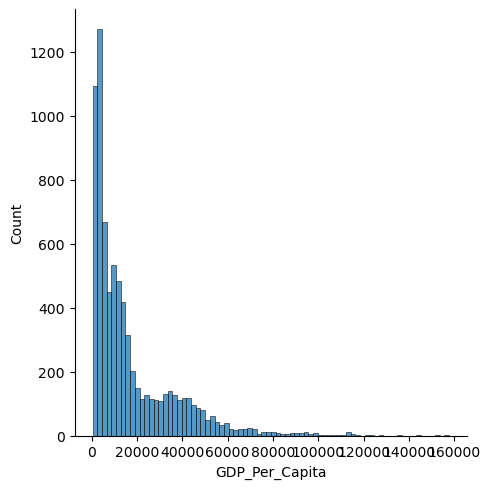

In [13]:
#histogram
sns.displot(data=gdp_df["GDP_Per_Capita"])


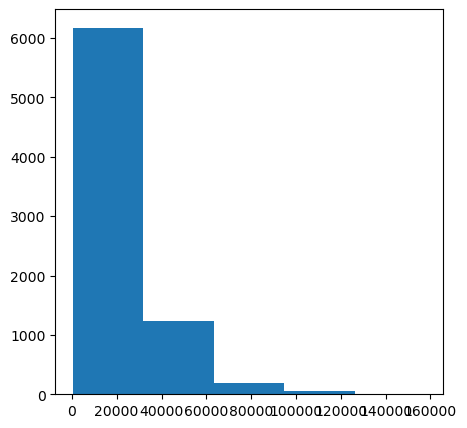

In [14]:
#another histogram
values = gdp_df.GDP_Per_Capita
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(values, bins=5);

C:\Users\mquar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

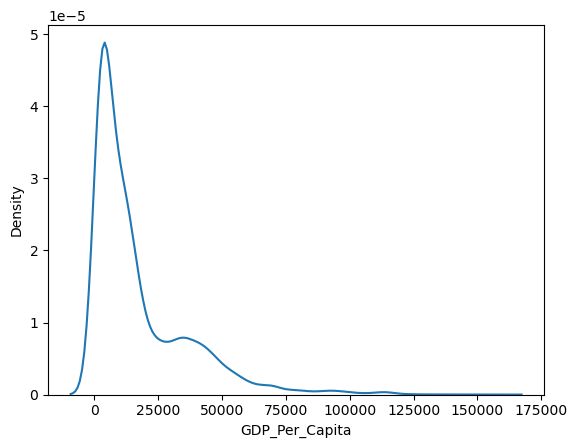

In [15]:
#density chart
sns.kdeplot(gdp_df['GDP_Per_Capita'])


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

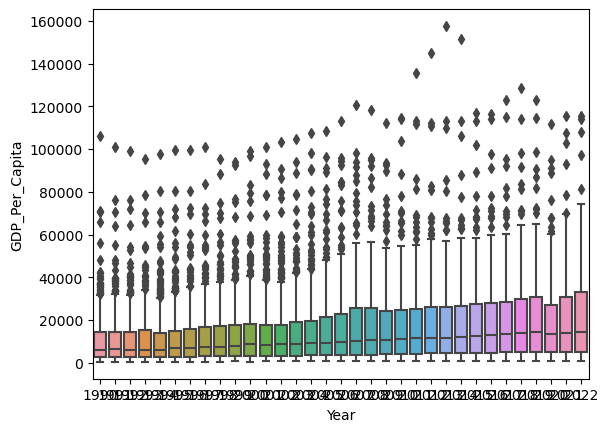

In [16]:
#boxplot
sns.boxplot( x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"] )

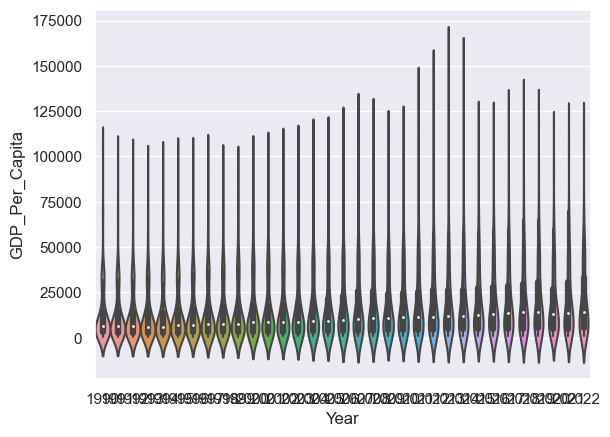

In [17]:
#violin plot - note: I tried switching the x and y axis to make labels more readable but it will not load when I do it that way
sns.set_theme(style="darkgrid")
sns.violinplot(x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"], width=1)
plt.show()

## Answer

Observations: A large numeber of countries have low GDP per capita, although you can also tell by the boxplot and violin plot that the average gdp per capita grows year over year

9. What was the median GDP per capita value in 2020?

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

## Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [18]:
print(gdp_df['Country'].value_counts() != 33)

Country
Least developed countries: UN classification    False
Middle East & North Africa                      False
Middle East & North Africa (IDA & IBRD)         False
Middle income                                   False
Mongolia                                        False
                                                ...  
Kosovo                                           True
Sint Maarten (Dutch part)                        True
Turks and Caicos Islands                         True
Somalia                                          True
Djibouti                                         True
Name: count, Length: 242, dtype: bool
